In [4]:
# BANKNOTE_AUTHENTICATION
#### WE WILL BE VISUALISING TOP FEATURES THAT WE EXTRACTED

### Visualising Top Features in Linear SVM
#https://medium.com/@aneesha/visualising-top-features-in-linear-svm-with-scikit-learn-and-matplotlib-3454ab18a14d
#https://stackabuse.com/implementing-svm-and-kernel-svm-with-pythons-scikit-learn/

In [54]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# to evaluate the algorithm
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [5]:
bankdata = pd.read_csv("bill_authentication.csv")

In [6]:
bankdata.columns

Index(['Variance', 'Skewness', 'Curtosis', 'Entropy', 'Class'], dtype='object')

In [9]:
bankdata.head(5)

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [8]:
bankdata.describe()

,Variance,Skewness,Curtosis,Entropy,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


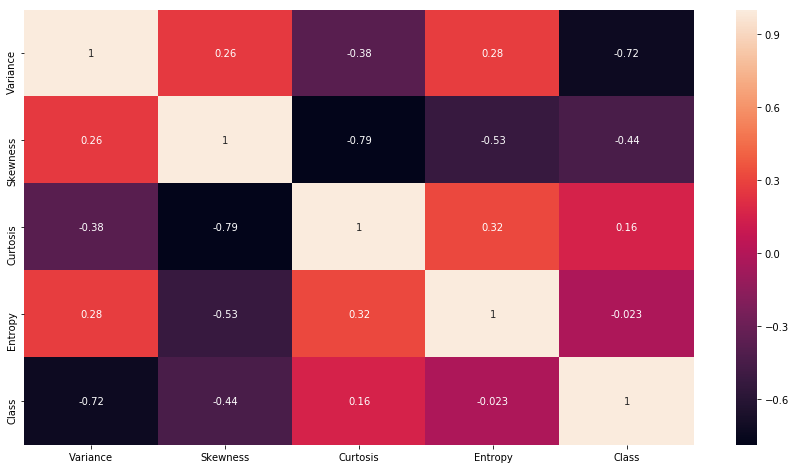

In [13]:
corrn = bankdata.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corrn, xticklabels=bankdata.columns.values,yticklabels=corrn.columns.values,
           annot=True)

In [17]:
bankdata[bankdata.columns[0]]

0       3.621600
1       4.545900
2       3.866000
3       3.456600
4       0.329240
5       4.368400
6       3.591200
7       2.092200
8       3.203200
9       1.535600
10      1.224700
11      3.989900
12      1.899300
13     -1.576800
14      3.404000
15      4.676500
16      2.671900
17      0.803550
18      1.447900
19      5.242300
20      5.786700
21      0.329200
22      3.936200
23      0.935840
24      4.433800
25      0.705700
26      1.143200
27     -0.382140
28      6.563300
29      4.890600
          ...   
1342   -1.747900
1343   -0.959230
1344    1.345100
1345    2.227900
1346    1.257200
1347   -5.385700
1348   -2.978600
1349   -1.585100
1350   -0.218880
1351    1.318300
1352    1.489600
1353    0.115920
1354   -3.392400
1355   -6.163200
1356   -4.078600
1357   -2.589900
1358   -1.011600
1359    0.066129
1360   -0.247450
1361   -1.573200
1362   -2.166800
1363   -1.166700
1364   -2.839100
1365   -4.504600
1366   -2.410000
1367    0.406140
1368   -1.388700
1369   -3.7503

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

<Figure size 2160x2160 with 0 Axes>

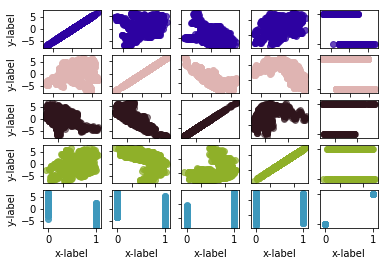

In [31]:
plt.figure(figsize=(30,30))
# for plotting colors
colrs = np.random.rand(6,4)
fig, axs = plt.subplots(5, 5)

for i in range(5):
    for j in range(5):
        #plt.subplot(5,j+1,i+1)
        axs[i, j].scatter(bankdata[bankdata.columns[i]],bankdata[bankdata.columns[j]],
                    c=colrs[i])
for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [ ]:
X = irisdata.drop('Class', axis=1)
y = irisdata['Class']

In [55]:
# The input data is centered but not scaled for each feature before applying 
# the SVD.
# Use StandardScaler to help you standardize the dataset’s features onto unit scale 
# (mean = 0 and variance = 1)
x = StandardScaler().fit_transform(X)

In [63]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['Component 1', 'Component 2'])

In [64]:
principalDf.head()

,Component 1,Component 2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


In [65]:
finalDf = pd.concat([principalDf, y], axis = 1)

In [66]:
finalDf.head()

,Component 1,Component 2,Class
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


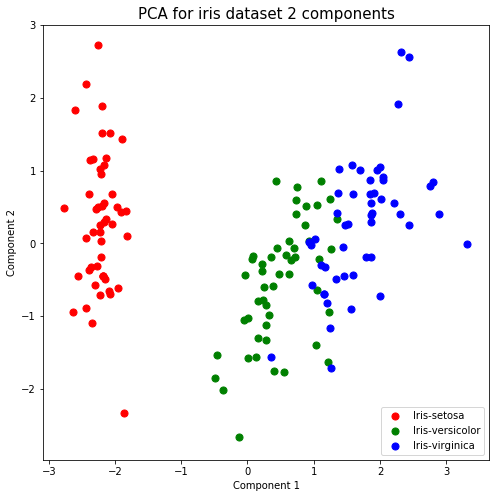

In [69]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Component 1', fontsize = 10)
ax.set_ylabel('Component 2', fontsize = 10)
ax.set_title('PCA for iris dataset 2 components', fontsize = 15)

targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']

for i in range(3):
    ids = finalDf['Class'] == targets[i]
    ax.scatter(finalDf.loc[ids, 'Component 1']
               , finalDf.loc[ids, 'Component 2']
               , c = colors[i]
               , s = 50)
ax.legend(targets)
#ax.grid()

In [70]:
# From this plot you can clearly tell that the Setosa class is linearly separable 
# from the other two classes. While the Versicolor and Virginica classes are 
# not completely separable by a straight line,

In [10]:
# now dealing only with training dataset
pca = PCA(n_components=2).fit(X_train)

# Linear SVM

In [39]:
# taraining model using SVM
# class takes one parameter, which is the kernel type
# we chose simple linear SVM
# simple SVM we simply set this parameter as "linear" since 
# simple SVMs can only classify linearly separable data
# SVM algorithm can be used to find decision boundary for linearly separable data.

In [35]:
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [36]:
# mamking prediction
y_pred = svclassifier.predict(X_test)

In [38]:
# Evaluating the Algorithm
# Confusion matrix, precision, recall, and F1 measures
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[133   2]
 [  1 139]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       135
           1       0.99      0.99      0.99       140

   micro avg       0.99      0.99      0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



# Kernel SVM

In [40]:
# we use iris dataset to predict the category to which a plant belongs based on four attributes: 
# sepal-width, sepal-length, petal-width and petal-length.

In [41]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
colnames = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
irisdata = pd.read_csv(url, names=colnames)

In [49]:
irisdata.shape

(150, 5)

In [43]:
irisdata.head(5)

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [52]:
irisdata.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [42]:
X = irisdata.drop('Class', axis=1)
y = irisdata['Class']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [48]:
for i in range(10):
    svclassifier = SVC(kernel='poly', degree=i)
    svclassifier.fit(X_train, y_train)
    y_pred = svclassifier.predict(X_test)
    print('degree: ',i)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

degre:  0
[[ 6  0  0]
 [14  0  0]
 [10  0  0]]
                 precision    recall  f1-score   support

    Iris-setosa       0.20      1.00      0.33         6
Iris-versicolor       0.00      0.00      0.00        14
 Iris-virginica       0.00      0.00      0.00        10

      micro avg       0.20      0.20      0.20        30
      macro avg       0.07      0.33      0.11        30
   weighted avg       0.04      0.20      0.07        30

degre:  1
[[ 6  0  0]
 [ 0 14  0]
 [ 0  0 10]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         6
Iris-versicolor       1.00      1.00      1.00        14
 Iris-virginica       1.00      1.00      1.00        10

      micro avg       1.00      1.00      1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

degre:  2
[[ 6  0  0]
 [ 0 14  0]
 [ 0  0 10]]
                 precision    recall  f1-score   suppor

C:\Users\Sidhant\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Sidhant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sidhant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sidhant\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no p

degre:  6
[[ 6  0  0]
 [ 0 14  0]
 [ 0  0 10]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         6
Iris-versicolor       1.00      1.00      1.00        14
 Iris-virginica       1.00      1.00      1.00        10

      micro avg       1.00      1.00      1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



C:\Users\Sidhant\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


degre:  7
[[ 6  0  0]
 [ 0 14  0]
 [ 0  0 10]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         6
Iris-versicolor       1.00      1.00      1.00        14
 Iris-virginica       1.00      1.00      1.00        10

      micro avg       1.00      1.00      1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



C:\Users\Sidhant\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


degre:  8
[[ 6  0  0]
 [ 0 14  0]
 [ 0  0 10]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         6
Iris-versicolor       1.00      1.00      1.00        14
 Iris-virginica       1.00      1.00      1.00        10

      micro avg       1.00      1.00      1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



C:\Users\Sidhant\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


degre:  9
[[ 6  0  0]
 [ 0 14  0]
 [ 0  0 10]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         6
Iris-versicolor       1.00      1.00      1.00        14
 Iris-virginica       1.00      1.00      1.00        10

      micro avg       1.00      1.00      1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

